<a href="https://colab.research.google.com/github/FrancoPalavicinoG/cellia/blob/main/notebooks/02_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load DF from Google Drive

Mount Drive

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load Dataframes

In [111]:
input_path = "/content/drive/MyDrive/cellia_drive/Datasets/"

df_demo = pd.read_excel(input_path + "demographics.xlsx")
df_exam = pd.read_excel(input_path + "examination.xlsx")
df_lab = pd.read_excel(input_path + "labs.xlsx")
df_quest = pd.read_excel(input_path + "questionnaire.xlsx")

In [112]:
print("Demographics shape:", df_demo.shape)
print("Examination shape:", df_exam.shape)
print("Labs shape:", df_lab.shape)
print("Questionnaire shape:", df_quest.shape)

Demographics shape: (10175, 5)
Examination shape: (9813, 5)
Labs shape: (9813, 15)
Questionnaire shape: (10175, 15)


### DF examples

In [113]:
def data_example(df, name, n=5):
    print(f"\n{name} – Data examples:")
    display(df.head(n))

In [114]:
dfs = {
    "Demographic": df_demo,
    "Examination": df_exam,
    "Labs": df_lab,
    "Questionnaire": df_quest
}

In [115]:
for name, df in dfs.items():
    data_example(df, name)


Demographic – Data examples:


,SEQN,GENDER,AGE_MONTHS_1,AGE_YEARS,AGE_MONTHS_2
0,73557,1,NaN,69,NaN
1,73558,1,NaN,54,NaN
2,73559,1,NaN,72,NaN
3,73560,1,NaN,9,119.0
4,73561,2,NaN,73,NaN



Examination – Data examples:


,SEQN,WEIGHT_COMMENT,BODY_MASS_INDEX,HEIGHT,WIGHT
0,73557,NaN,26.7,171.3,78.3
1,73558,NaN,28.6,176.8,89.5
2,73559,NaN,28.9,175.3,88.9
3,73560,NaN,17.1,137.3,32.2
4,73561,NaN,19.7,162.4,52.0



Labs – Data examples:


,SEQN,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,CREATININE_1,TRIGLYCERIDES_R1,CHOLESTEROL_2,CREATININE_2,TRIGLYCERIDES_R2,LDL_1,LDL_2,TRIGLYCERIDE_1,TRIGLYCERIDE_2,HDL_1,HDL_2
0,73557,4.32,167.0,4.344,106.96,1.581,168.0,1.21,140.0,NaN,NaN,NaN,NaN,1.68,65.0
1,73558,4.40,170.0,4.319,69.84,2.902,167.0,0.79,257.0,NaN,NaN,NaN,NaN,1.29,50.0
2,73559,3.26,126.0,3.284,107.85,0.576,127.0,1.22,51.0,1.448,56.0,0.576,51.0,1.55,60.0
3,73560,4.34,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.58,61.0
4,73561,5.20,201.0,5.353,64.53,0.994,207.0,0.73,88.0,2.612,101.0,0.847,75.0,2.20,85.0



Questionnaire – Data examples:


,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,62.0,2.0
1,73558,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2,73559,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


## ETL

### 1. Normalize Age, Sex, Weight, Height, and BMI

Map gender in binary form
*   1: Male -> 1
*   2: Female -> 0

In [116]:
gender_map = {1: 1, 2: 0}
df_demo['GENDER'] = df_demo['GENDER'].map(gender_map)

Drop rows where AGE_YEARS <= 18

In [117]:
df_demo = df_demo[df_demo['AGE_YEARS'] > 18].copy()

Drop column AGE_MONTHS_1 (Used with under two years old)

In [118]:
df_demo = df_demo.drop(columns=['AGE_MONTHS_1'])

Convert special values (7777 = refused, 9999 = don’t know) to NaN

In [119]:
df_demo['AGE_YEARS'] = df_demo['AGE_YEARS'].replace({7777: np.nan, 9999: np.nan})

Convert age in years to age in months.

In [120]:
def age_years_to_months(df, col_years='AGE_YEARS', col_months='AGE_MONTHS_2'):
    df[col_months] = df[col_years] * 12
    return df

In [121]:
df_demo = age_years_to_months(df_demo)

Rename AGE_MONTHS_2

In [122]:
df_demo = df_demo.rename(columns={'AGE_MONTHS_2': 'AGE_MONTHS'})

In [123]:
display(df_demo.head())

,SEQN,GENDER,AGE_YEARS,AGE_MONTHS
0,73557,1,69,828
1,73558,1,54,648
2,73559,1,72,864
4,73561,0,73,876
5,73562,1,56,672


In [124]:
def null_summary(df, name):
    nulls = df.isnull().sum()
    total = len(df)
    summary = pd.DataFrame({
        "Column": nulls.index,
        "Nulls": nulls.values,
        "Percent": (nulls.values / total * 100).round(2)
    })
    print(f"\nDataset: {name}")
    display(summary)

In [125]:
null_summary(df_demo, "Demographics")


Dataset: Demographics


,Column,Nulls,Percent
0,SEQN,0,0.0
1,GENDER,0,0.0
2,AGE_YEARS,0,0.0
3,AGE_MONTHS,0,0.0


Rename WEIGHT column

In [126]:
df_exam = df_exam.rename(columns={'WIGHT': 'WEIGHT'})

Drop the WEIGHT_COMMENT column

In [127]:
df_exam = df_exam.drop(columns=['WEIGHT_COMMENT'])

 Calculate BMI for rows with missing BMI, given weight (kg) and height (cm).

In [128]:
def calculate_bmi(df, weight_col='WEIGHT', height_col='HEIGHT', bmi_col='BODY_MASS_INDEX'):
    # Only calculate where BMI is missing and height/weight are present
    mask = df[bmi_col].isna() & df[weight_col].notna() & df[height_col].notna()

    # Convert height to meters
    height_m = df.loc[mask, height_col] / 100

    # Calculate BMI
    df.loc[mask, bmi_col] = df.loc[mask, weight_col] / (height_m ** 2)

    return df

Calculate weight where missing given BMI and height.

In [129]:
def calculate_weight_from_bmi(df, bmi_col='BODY_MASS_INDEX', height_col='HEIGHT', weight_col='WEIGHT'):
    mask = df[weight_col].isna() & df[bmi_col].notna() & df[height_col].notna()
    height_m = df.loc[mask, height_col] / 100
    df.loc[mask, weight_col] = df.loc[mask, bmi_col] * (height_m ** 2)
    return df

Calculate height where missing given BMI and weight.

In [130]:
def calculate_height_from_bmi(df, bmi_col='BODY_MASS_INDEX', weight_col='WEIGHT', height_col='HEIGHT'):
    mask = df[height_col].isna() & df[bmi_col].notna() & df[weight_col].notna()
    df.loc[mask, height_col] = np.sqrt(df.loc[mask, weight_col] / df.loc[mask, bmi_col]) * 100
    return df

In [131]:
df_exam = calculate_bmi(df_exam)

In [132]:
df_exam = calculate_weight_from_bmi(df_exam)
df_exam = calculate_height_from_bmi(df_exam)

Drop rows where HEIGHT or WEIGHT is missing

In [133]:
df_exam = df_exam[df_exam['HEIGHT'].notna() & df_exam['WEIGHT'].notna()].copy()

In [134]:
display(df_exam.head())
null_summary(df_exam, "Examination")

,SEQN,BODY_MASS_INDEX,HEIGHT,WEIGHT
0,73557,26.7,171.3,78.3
1,73558,28.6,176.8,89.5
2,73559,28.9,175.3,88.9
3,73560,17.1,137.3,32.2
4,73561,19.7,162.4,52.0



Dataset: Examination


,Column,Nulls,Percent
0,SEQN,0,0.0
1,BODY_MASS_INDEX,0,0.0
2,HEIGHT,0,0.0
3,WEIGHT,0,0.0


### 2. Map binary variables

Mapping for binary-like responses in questionnaire **DF**

In [135]:
map_binary = {1: 1, 2: 0, 7: np.nan, 9: np.nan}

Columns to map

In [136]:
binary_cols = [
    "HYPERTENSION_1",
    "HYPERTENSION_2",
    "HIGH_CHOLESTEROL",
    "HEART_FAILURE",
    "CORO_HEART_DISEASE",
    "ANGINA_PECTORIS",
    "HEART_ATTACK",
    "STROKE",
    "HEART_ATTACK_RELATIVES"
]

In [137]:
df_quest[binary_cols] = df_quest[binary_cols].replace(map_binary)

Map ages in questionnaire DF

In [138]:
map_ages = {7777: np.nan, 9999: np.nan}

In [139]:
age_cols = [
    "HEART_FAILURE_AGE",
    "CORO_HEART_DISEASE_AGE",
    "ANGINA_PECTORIS_AGE",
    "HEART_ATTACK_AGE",
    "STROKE_AGE",
]

In [140]:
df_quest[age_cols] = df_quest[age_cols].replace(map_ages)

In [141]:
display(df_quest.head())
null_summary(df_quest, "Questionnaire")

,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,62.0,0.0
1,73558,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,73559,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0
3,73560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0



Dataset: Questionnaire


,Column,Nulls,Percent
0,SEQN,0,0.00
1,HYPERTENSION_1,3716,36.52
2,HYPERTENSION_2,8009,78.71
3,HIGH_CHOLESTEROL,3747,36.83
4,HEART_FAILURE,4414,43.38
5,CORO_HEART_DISEASE,4424,43.48
6,ANGINA_PECTORIS,4414,43.38
7,HEART_ATTACK,4409,43.33
8,STROKE,4411,43.35
9,HEART_FAILURE_AGE,9993,98.21


### 3. Handle missing values

Drop rows (users) where fraction of NULLs (calculated over selected columns) > threshold. By default excludes id_col from the calculation. You can pass additional columns to exclude.

In [142]:
def drop_high_null_rows(df, threshold=0.7, id_col="SEQN", exclude_cols=None, return_dropped=False):
    if exclude_cols is None:
        exclude_cols = []

    # columns used to compute null fraction (exclude id_col + any extra)
    cols_for_calc = [c for c in df.columns if c not in exclude_cols + [id_col]]
    if not cols_for_calc:
        raise ValueError("No columns left to evaluate null fraction. Check exclude_cols and id_col.")

    # fraction null per row computed only on cols_for_calc
    null_frac = df[cols_for_calc].isnull().mean(axis=1)

    # mask of rows to drop
    mask_drop = null_frac > threshold

    dropped_df = df.loc[mask_drop].copy()
    kept_df   = df.loc[~mask_drop].copy()

    print(f"Dropped {mask_drop.sum()} rows out of {len(df)} (threshold {threshold*100:.0f}%)")
    if return_dropped:
        return kept_df, dropped_df
    return kept_df

In [143]:
df_quest = drop_high_null_rows(df_quest, threshold=0.7, id_col="SEQN", exclude_cols=age_cols)
df_lab = drop_high_null_rows(df_lab, threshold=0.7, id_col="SEQN", exclude_cols=[])

Dropped 4377 rows out of 10175 (threshold 70%)
Dropped 3246 rows out of 9813 (threshold 70%)


Fill with 0 to indicate no disease

In [144]:
age_disease_cols = [
    "HEART_FAILURE_AGE",
    "CORO_HEART_DISEASE_AGE",
    "ANGINA_PECTORIS_AGE",
    "HEART_ATTACK_AGE",
    "STROKE_AGE",
    "HEART_ATTACK_RELATIVES",
]

In [145]:
df_quest[age_disease_cols] = df_quest[age_disease_cols].fillna(0)

In [146]:
display(df_quest.head())
null_summary(df_quest, "Questionnaire")
display(df_lab.head())
null_summary(df_lab, "Labs")

,SEQN,HYPERTENSION_1,HYPERTENSION_2,HIGH_CHOLESTEROL,HEART_FAILURE,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,73562,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0



Dataset: Questionnaire


,Column,Nulls,Percent
0,SEQN,0,0.00
1,HYPERTENSION_1,4,0.07
2,HYPERTENSION_2,3632,62.64
3,HIGH_CHOLESTEROL,34,0.59
4,HEART_FAILURE,37,0.64
5,CORO_HEART_DISEASE,47,0.81
6,ANGINA_PECTORIS,37,0.64
7,HEART_ATTACK,32,0.55
8,STROKE,34,0.59
9,HEART_FAILURE_AGE,0,0.00


,SEQN,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,CREATININE_1,TRIGLYCERIDES_R1,CHOLESTEROL_2,CREATININE_2,TRIGLYCERIDES_R2,LDL_1,LDL_2,TRIGLYCERIDE_1,TRIGLYCERIDE_2,HDL_1,HDL_2
0,73557,4.32,167.0,4.344,106.96,1.581,168.0,1.21,140.0,NaN,NaN,NaN,NaN,1.68,65.0
1,73558,4.40,170.0,4.319,69.84,2.902,167.0,0.79,257.0,NaN,NaN,NaN,NaN,1.29,50.0
2,73559,3.26,126.0,3.284,107.85,0.576,127.0,1.22,51.0,1.448,56.0,0.576,51.0,1.55,60.0
4,73561,5.20,201.0,5.353,64.53,0.994,207.0,0.73,88.0,2.612,101.0,0.847,75.0,2.20,85.0
5,73562,5.84,226.0,5.948,78.68,3.692,230.0,0.89,327.0,NaN,NaN,NaN,NaN,0.98,38.0



Dataset: Labs


,Column,Nulls,Percent
0,SEQN,0,0.00
1,TOTAL_CHOL_1,1,0.02
2,TOTAL_CHOL_2,1,0.02
3,CHOLESTEROL_1,16,0.24
4,CREATININE_1,14,0.21
5,TRIGLYCERIDES_R1,18,0.27
6,CHOLESTEROL_2,16,0.24
7,CREATININE_2,14,0.21
8,TRIGLYCERIDES_R2,18,0.27
9,LDL_1,3462,52.72


### 4. Merge DF

Inner join by SEQN to ensure all data for each participant is together.

In [147]:
df = df_demo.merge(df_exam, on="SEQN", how="inner") \
                         .merge(df_lab, on="SEQN", how="inner") \
                         .merge(df_quest, on="SEQN", how="inner")

In [148]:
def basic_eda(df, name, n=3):
    print(f"\n===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nData type:")
    print(df.dtypes.value_counts())

In [149]:
basic_eda(df, "Merged")
display(df.head(10))
null_summary(df, "Merged")


===== Merged =====
Shape: (5284, 35)
Columns: ['SEQN', 'GENDER', 'AGE_YEARS', 'AGE_MONTHS', 'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'TOTAL_CHOL_1', 'TOTAL_CHOL_2', 'CHOLESTEROL_1', 'CREATININE_1', 'TRIGLYCERIDES_R1', 'CHOLESTEROL_2', 'CREATININE_2', 'TRIGLYCERIDES_R2', 'LDL_1', 'LDL_2', 'TRIGLYCERIDE_1', 'TRIGLYCERIDE_2', 'HDL_1', 'HDL_2', 'HYPERTENSION_1', 'HYPERTENSION_2', 'HIGH_CHOLESTEROL', 'HEART_FAILURE', 'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE', 'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE', 'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES']

Data type:
float64    31
int64       4
Name: count, dtype: int64


,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL_1,TOTAL_CHOL_2,CHOLESTEROL_1,...,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1,69,828,26.7,171.3,78.3,4.32,167.0,4.344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1,54,648,28.6,176.8,89.5,4.40,170.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1,72,864,28.9,175.3,88.9,3.26,126.0,3.284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73561,0,73,876,19.7,162.4,52.0,5.20,201.0,5.353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73562,1,56,672,41.7,158.7,105.0,5.84,226.0,5.948,...,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0
5,73564,0,61,732,35.7,161.8,93.4,4.34,168.0,4.319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73566,0,56,672,26.5,152.8,61.8,7.19,278.0,7.189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73567,1,65,780,22.0,172.4,65.3,4.47,173.0,4.396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,73568,0,26,312,20.3,152.5,47.1,4.34,168.0,4.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,73571,1,76,912,34.4,172.5,102.4,4.32,167.0,4.060,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0



Dataset: Merged


,Column,Nulls,Percent
0,SEQN,0,0.00
1,GENDER,0,0.00
2,AGE_YEARS,0,0.00
3,AGE_MONTHS,0,0.00
4,BODY_MASS_INDEX,0,0.00
5,HEIGHT,0,0.00
6,WEIGHT,0,0.00
7,TOTAL_CHOL_1,0,0.00
8,TOTAL_CHOL_2,0,0.00
9,CHOLESTEROL_1,11,0.21


### 5. Unify parameters in mg/dL format

Biomarkers Variables in md/dL and mmol/L

In [150]:
mgdl_cols = [
    'CHOLESTEROL_2',
    'TOTAL_CHOL_2',
    'HDL_2',
    'LDL_2',
    'TRIGLYCERIDES_R2',
    'TRIGLYCERIDE_2',
    'CREATININE_2',
]

mmoll_cols = [
    'CHOLESTEROL_1',
    'TOTAL_CHOL_1',
    'HDL_1',
    'LDL_1',
    'TRIGLYCERIDES_R1',
    'TRIGLYCERIDE_1',
    'CREATININE_1',
]

 Drop columns in mmol/L

In [151]:
df = df.drop(columns=mmoll_cols)

Rename mg/dL columns by removing the "_2" suffix

In [152]:
df = df.rename(columns={c: c.replace('_2', '') for c in mgdl_cols})

In [153]:
print(df.columns)

Index(['SEQN', 'GENDER', 'AGE_YEARS', 'AGE_MONTHS', 'BODY_MASS_INDEX',
       'HEIGHT', 'WEIGHT', 'TOTAL_CHOL', 'CHOLESTEROL', 'CREATININE',
       'TRIGLYCERIDES_R2', 'LDL', 'TRIGLYCERIDE', 'HDL', 'HYPERTENSION_1',
       'HYPERTENSION_2', 'HIGH_CHOLESTEROL', 'HEART_FAILURE',
       'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE',
       'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE',
       'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES'],
      dtype='object')


### 6. Iterative Imputation of Missing Biomedical Values

Biomarkers Variables

In [154]:
bio_cols = [
    'CHOLESTEROL',
    'TOTAL_CHOL',
    'HDL',
    'LDL',
    'TRIGLYCERIDES_R2',
    'TRIGLYCERIDE',
    'CREATININE',
    'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'AGE_YEARS', 'GENDER'
]

Box plot for outliers BEFORE imputation

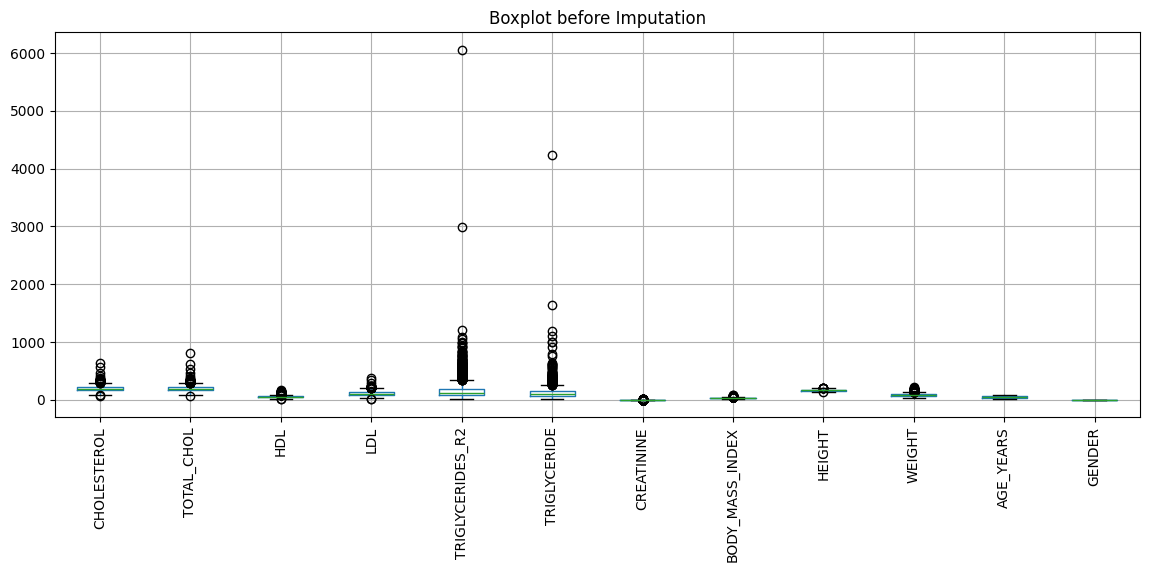

In [155]:
import matplotlib.pyplot as plt

df[bio_cols].boxplot(rot=90, figsize=(14,5))
plt.title("Boxplot before Imputation")
plt.show()

IterativeImputer feature from scikit-learn

In [156]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

imp_iter = IterativeImputer(random_state=42, max_iter=15, tol=1e-3)
df[bio_cols] = imp_iter.fit_transform(df[bio_cols])

Descriptive Statistics of Biomedical Variables

In [157]:
df[bio_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CHOLESTEROL,5284.0,190.576800,42.837874,72.000000,162.000000,187.000000,216.000000,816.774048
TOTAL_CHOL,5284.0,189.193036,41.834968,69.000000,161.000000,186.000000,214.000000,813.000000
HDL,5284.0,52.816238,16.070334,10.000000,42.000000,50.000000,61.000000,173.000000
LDL,5284.0,108.845838,29.570861,-274.653653,90.991856,106.366573,124.309069,376.240438
TRIGLYCERIDES_R2,5284.0,153.484936,144.278537,20.000000,80.000000,119.000000,187.000000,6057.000000
TRIGLYCERIDE,5284.0,137.673323,133.478809,-133.583799,63.000000,108.000000,184.000000,4233.000000
CREATININE,5284.0,0.914623,0.519218,0.300000,0.720000,0.850000,1.010000,17.410000
BODY_MASS_INDEX,5284.0,29.128804,7.117594,14.100000,24.200000,27.900000,32.500000,77.500000
HEIGHT,5284.0,167.076981,10.195275,136.300000,159.700000,166.750000,174.300000,202.600000
WEIGHT,5284.0,81.567222,22.060808,32.300000,66.200000,78.300000,92.900000,222.600000


Box plot for outliers AFTER imputation

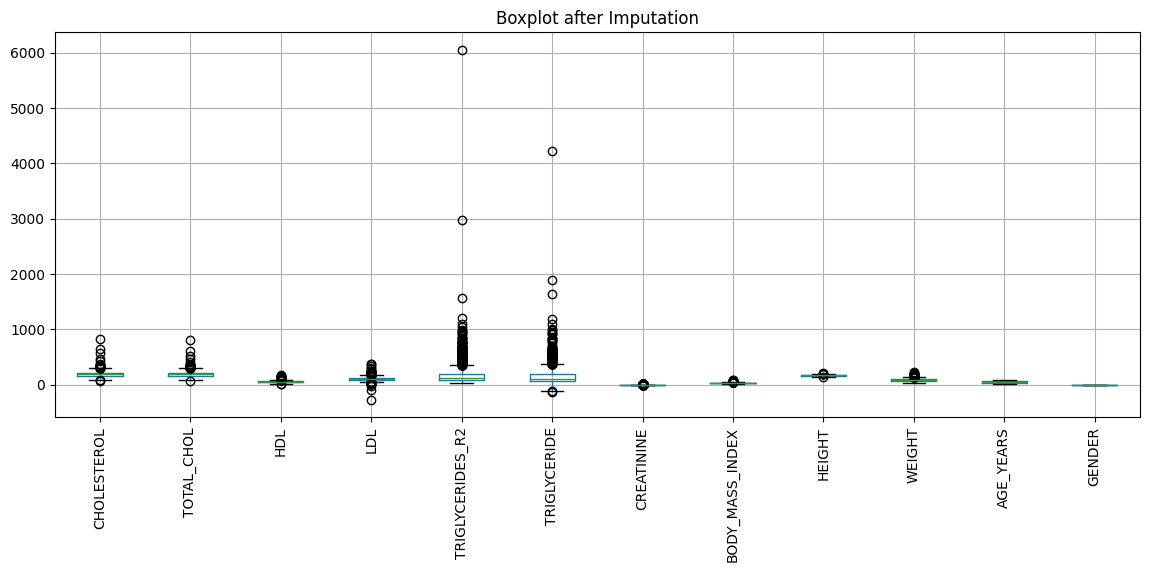

In [158]:
df[bio_cols].boxplot(rot=90, figsize=(14,5))
plt.title("Boxplot after Imputation")
plt.show()

In [159]:
basic_eda(df, "Merged after Imputation")
display(df.head(10))
null_summary(df, "Merged after Imputation")



===== Merged after Imputation =====
Shape: (5284, 28)
Columns: ['SEQN', 'GENDER', 'AGE_YEARS', 'AGE_MONTHS', 'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'TOTAL_CHOL', 'CHOLESTEROL', 'CREATININE', 'TRIGLYCERIDES_R2', 'LDL', 'TRIGLYCERIDE', 'HDL', 'HYPERTENSION_1', 'HYPERTENSION_2', 'HIGH_CHOLESTEROL', 'HEART_FAILURE', 'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE', 'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE', 'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES']

Data type:
float64    26
int64       2
Name: count, dtype: int64


,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL,CHOLESTEROL,CREATININE,...,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,69.0,828,26.7,171.3,78.3,167.0,168.0,1.21,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1.0,54.0,648,28.6,176.8,89.5,170.0,167.0,0.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1.0,72.0,864,28.9,175.3,88.9,126.0,127.0,1.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73561,0.0,73.0,876,19.7,162.4,52.0,201.0,207.0,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73562,1.0,56.0,672,41.7,158.7,105.0,226.0,230.0,0.89,...,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0
5,73564,0.0,61.0,732,35.7,161.8,93.4,168.0,167.0,0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73566,0.0,56.0,672,26.5,152.8,61.8,278.0,278.0,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73567,1.0,65.0,780,22.0,172.4,65.3,173.0,170.0,0.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,73568,0.0,26.0,312,20.3,152.5,47.1,168.0,174.0,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,73571,1.0,76.0,912,34.4,172.5,102.4,167.0,157.0,1.19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0



Dataset: Merged after Imputation


,Column,Nulls,Percent
0,SEQN,0,0.00
1,GENDER,0,0.00
2,AGE_YEARS,0,0.00
3,AGE_MONTHS,0,0.00
4,BODY_MASS_INDEX,0,0.00
5,HEIGHT,0,0.00
6,WEIGHT,0,0.00
7,TOTAL_CHOL,0,0.00
8,CHOLESTEROL,0,0.00
9,CREATININE,0,0.00


In [160]:
print("Biomedical Variables after Imputation")
display(df[bio_cols].head(10))


Biomedical Variables after Imputation


,CHOLESTEROL,TOTAL_CHOL,HDL,LDL,TRIGLYCERIDES_R2,TRIGLYCERIDE,CREATININE,BODY_MASS_INDEX,HEIGHT,WEIGHT,AGE_YEARS,GENDER
0,168.0,167.0,65.0,91.023699,140.0,55.135286,1.21,26.7,171.3,78.3,69.0,1.0
1,167.0,170.0,50.0,87.339858,257.0,163.538262,0.79,28.6,176.8,89.5,54.0,1.0
2,127.0,126.0,60.0,56.000000,51.0,51.000000,1.22,28.9,175.3,88.9,72.0,1.0
3,207.0,201.0,85.0,101.000000,88.0,75.000000,0.73,19.7,162.4,52.0,73.0,0.0
4,230.0,226.0,38.0,120.084175,327.0,339.388729,0.89,41.7,158.7,105.0,56.0,1.0
5,167.0,168.0,58.0,97.000000,68.0,64.000000,0.92,35.7,161.8,93.4,61.0,0.0
6,278.0,278.0,59.0,143.962446,262.0,374.883982,0.55,26.5,152.8,61.8,56.0,0.0
7,170.0,173.0,79.0,96.775162,39.0,-13.600138,0.97,22.0,172.4,65.3,65.0,1.0
8,174.0,168.0,96.0,67.000000,31.0,24.000000,0.74,20.3,152.5,47.1,26.0,0.0
9,157.0,167.0,50.0,81.995430,284.0,175.358421,1.19,34.4,172.5,102.4,76.0,1.0


### Remove rows with missing disease values & drop column HYPERTENSION_2

In [161]:
binary_disease_cols = [
    "HYPERTENSION_1", "HIGH_CHOLESTEROL", "HEART_FAILURE", "CORO_HEART_DISEASE",
    "ANGINA_PECTORIS", "HEART_ATTACK", "STROKE"
]

In [162]:
df_clean = df.dropna(subset=binary_disease_cols)

In [163]:
df_clean = df_clean.drop(columns=['HYPERTENSION_2'])

Rename some variables

In [164]:
df_clean = df_clean.rename(columns={
    'TRIGLYCERIDES_R2': 'TRIGLYCERIDES_R',
    'HYPERTENSION_1': 'HYPERTENSION'
})

In [165]:
basic_eda(df_clean, "Clean DF")
display(df_clean.head(10))
null_summary(df_clean, "Clean DF")


===== Clean DF =====
Shape: (5214, 27)
Columns: ['SEQN', 'GENDER', 'AGE_YEARS', 'AGE_MONTHS', 'BODY_MASS_INDEX', 'HEIGHT', 'WEIGHT', 'TOTAL_CHOL', 'CHOLESTEROL', 'CREATININE', 'TRIGLYCERIDES_R', 'LDL', 'TRIGLYCERIDE', 'HDL', 'HYPERTENSION', 'HIGH_CHOLESTEROL', 'HEART_FAILURE', 'CORO_HEART_DISEASE', 'ANGINA_PECTORIS', 'HEART_ATTACK', 'STROKE', 'HEART_FAILURE_AGE', 'CORO_HEART_DISEASE_AGE', 'ANGINA_PECTORIS_AGE', 'HEART_ATTACK_AGE', 'STROKE_AGE', 'HEART_ATTACK_RELATIVES']

Data type:
float64    25
int64       2
Name: count, dtype: int64


,SEQN,GENDER,AGE_YEARS,AGE_MONTHS,BODY_MASS_INDEX,HEIGHT,WEIGHT,TOTAL_CHOL,CHOLESTEROL,CREATININE,...,CORO_HEART_DISEASE,ANGINA_PECTORIS,HEART_ATTACK,STROKE,HEART_FAILURE_AGE,CORO_HEART_DISEASE_AGE,ANGINA_PECTORIS_AGE,HEART_ATTACK_AGE,STROKE_AGE,HEART_ATTACK_RELATIVES
0,73557,1.0,69.0,828,26.7,171.3,78.3,167.0,168.0,1.21,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62.0,0.0
1,73558,1.0,54.0,648,28.6,176.8,89.5,170.0,167.0,0.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73559,1.0,72.0,864,28.9,175.3,88.9,126.0,127.0,1.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,73561,0.0,73.0,876,19.7,162.4,52.0,201.0,207.0,0.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73562,1.0,56.0,672,41.7,158.7,105.0,226.0,230.0,0.89,...,1.0,0.0,1.0,0.0,0.0,54.0,0.0,55.0,0.0,0.0
5,73564,0.0,61.0,732,35.7,161.8,93.4,168.0,167.0,0.92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,73566,0.0,56.0,672,26.5,152.8,61.8,278.0,278.0,0.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,73567,1.0,65.0,780,22.0,172.4,65.3,173.0,170.0,0.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,73568,0.0,26.0,312,20.3,152.5,47.1,168.0,174.0,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,73571,1.0,76.0,912,34.4,172.5,102.4,167.0,157.0,1.19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0



Dataset: Clean DF


,Column,Nulls,Percent
0,SEQN,0,0.0
1,GENDER,0,0.0
2,AGE_YEARS,0,0.0
3,AGE_MONTHS,0,0.0
4,BODY_MASS_INDEX,0,0.0
5,HEIGHT,0,0.0
6,WEIGHT,0,0.0
7,TOTAL_CHOL,0,0.0
8,CHOLESTEROL,0,0.0
9,CREATININE,0,0.0
